In [85]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("walmart_data.csv")

In [3]:
df.head(3)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422


In [4]:
df.shape

(550068, 10)

In [5]:
df.corr()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
User_ID,1.000000,-0.023971,0.020443,0.003825,0.004716
Occupation,-0.023971,1.000000,0.024280,-0.007618,0.020833
Marital_Status,0.020443,0.024280,1.000000,0.019888,-0.000463
Product_Category,0.003825,-0.007618,0.019888,1.000000,-0.343703
Purchase,0.004716,0.020833,-0.000463,-0.343703,1.000000


<AxesSubplot:>

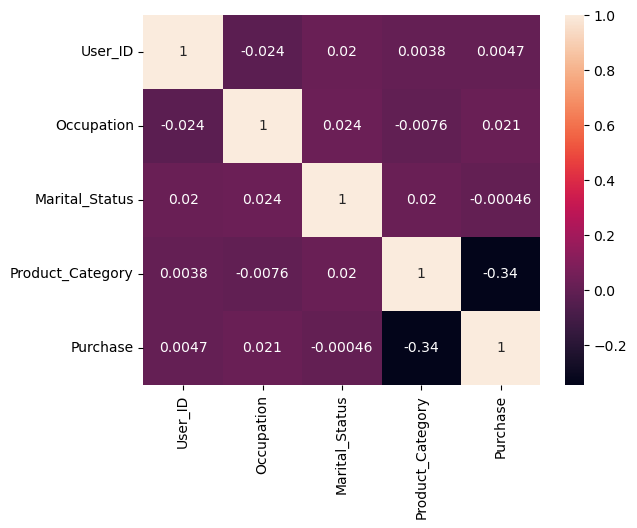

In [6]:
sns.heatmap(df.corr(),annot=True)

In [71]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


<AxesSubplot:xlabel='Gender', ylabel='Purchase'>

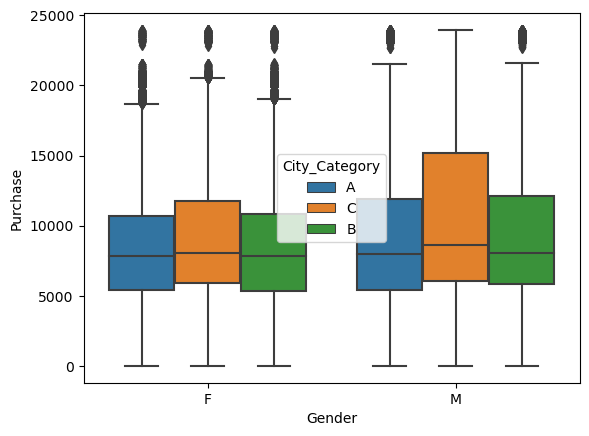

In [73]:
sns.boxplot(data=df,x="Gender",y="Purchase",hue="City_Category")

<AxesSubplot:xlabel='Gender', ylabel='Purchase'>

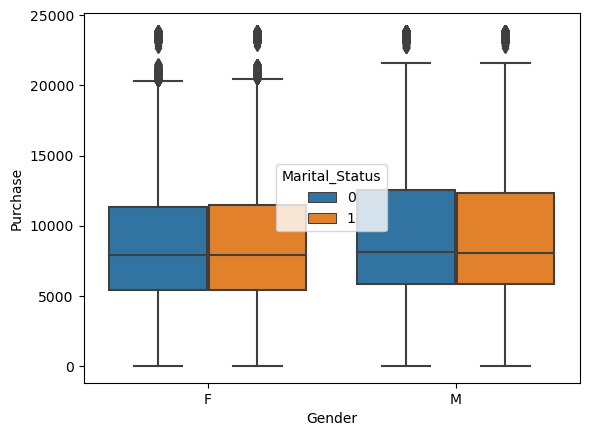

In [74]:
sns.boxplot(data=df,x="Gender",y="Purchase",hue="Marital_Status")

In [7]:
df.groupby(["Gender"])["Purchase"].mean()

Gender
F    8734.565765
M    9437.526040
Name: Purchase, dtype: float64

In [66]:
print(df[df["Gender"] == "F"].shape[0]/df.shape[0])# Female Probabilty of purchasing
print(1 - df[df["Gender"] == "F"].shape[0]/df.shape[0]) # Male Probabilty of purchasing

0.24689492935418894
0.7531050706458111


# Gender

1. 95% Confidence interval

In [67]:
female_sample_mean = []
for i in range(100):
    female_sample_mean.append(np.random.choice(df[df["Gender"] == "F"]["Purchase"],1000).mean())
clt1 = np.mean(female_sample_mean) - (1.96*np.std(df[df["Gender"] == "F"]["Purchase"])/np.sqrt(1000))
clt2 = np.mean(female_sample_mean) + (1.96*np.std(df[df["Gender"] == "F"]["Purchase"])/np.sqrt(1000))

print("Confidence interval for female customers: ({}, {})".format(clt1, clt2))

# 95% confidence interval for female customers buying in the range of (8431.818847341126, 9022.769032658869)
# The actual population mean for female customers = 8734.565765
# our sample confidence interval proves that 95% of female customers are buying in the range of 8431.82 - 9022.76

Confidence interval for female customers: (8431.818847341126, 9022.769032658869)


In [10]:
male_sample_mean = []
for i in range(100):
    male_sample_mean.append(np.random.choice(df[df["Gender"] == "M"]["Purchase"],1000).mean())
clt1 = np.mean(male_sample_mean) - (1.96*np.std(df[df["Gender"] == "M"]["Purchase"])/np.sqrt(1000))
clt2 = np.mean(male_sample_mean) + (1.96*np.std(df[df["Gender"] == "M"]["Purchase"])/np.sqrt(1000))

print("Confidence interval for Male customers: ({}, {})".format(clt1, clt2))

# 95% confidence interval for male customers buying in the range of (9336.350516052735, 9535.963974547263)
# The actual population mean for male customers = 9437.526040
# our sample confidence interval proves that 95% of male customers are buying in the range of 9336.35 - 9535.96

Confidence interval for Male customers: (9336.350516052735, 9535.963974547263)


2. 99% Confidence Interval

In [11]:
f_sample_size = 1000
female_sample_mean = []
for i in range(100):
    female_sample_mean.append(np.random.choice(df[df["Gender"] == "F"]["Purchase"],f_sample_size).mean())
clt1 = np.mean(female_sample_mean) - (norm.ppf(0.99)*np.std(df[df["Gender"] == "F"]["Purchase"])/np.sqrt(f_sample_size))
clt2 = np.mean(female_sample_mean) + (norm.ppf(0.99)*np.std(df[df["Gender"] == "F"]["Purchase"])/np.sqrt(f_sample_size))

print("Confidence interval for female customers: ({}, {})".format(clt1, clt2))

# 99% confidence interval for female customers buying in the range of (8373.068243449497, 9074.474216550503)
# The actual population mean for female customers = 8734.565765
# our sample confidence interval proves that 99% of female customers are buying in the range of 8431.82 - 9022.76

Confidence interval for female customers: (8373.068243449497, 9074.474216550503)


In [12]:
m_sample_size = 10000
male_sample_mean = []
for i in range(1000):
    male_sample_mean.append(np.random.choice(df[df["Gender"] == "M"]["Purchase"],m_sample_size).mean())
clt1 = np.mean(male_sample_mean) - (norm.ppf(0.99)*np.std(df[df["Gender"] == "M"]["Purchase"])/np.sqrt(m_sample_size))
clt2 = np.mean(male_sample_mean) + (norm.ppf(0.99)*np.std(df[df["Gender"] == "M"]["Purchase"])/np.sqrt(m_sample_size))

print("Confidence interval for Male customers: ({}, {})".format(clt1, clt2))

# 99% confidence interval for male customers buying in the range of (9317.895776347275, 9554.819421652726)
# The actual population mean for male customers = 9437.526040
# our sample confidence interval proves that 99% of male customers are buying in the range of 9317.90 - 9535.82

Confidence interval for Male customers: (9317.895776347275, 9554.819421652726)


3. 90% Confidence Interval

In [13]:
f_sample_size = 1000
female_sample_mean = []
for i in range(100):
    female_sample_mean.append(np.random.choice(df[df["Gender"] == "F"]["Purchase"],f_sample_size).mean())
clt1 = np.mean(female_sample_mean) - (norm.ppf(0.90)*np.std(df[df["Gender"] == "F"]["Purchase"])/np.sqrt(f_sample_size))
clt2 = np.mean(female_sample_mean) + (norm.ppf(0.90)*np.std(df[df["Gender"] == "F"]["Purchase"])/np.sqrt(f_sample_size))

print("Confidence interval for female customers: ({}, {})".format(clt1, clt2))

# 90% confidence interval for female customers buying in the range of (8561.08909164469, 8947.483548355312)
# The actual population mean for female customers = 8734.565765
# our sample confidence interval proves that 90% of female customers are buying in the range of 8561.08 - 8947.48

Confidence interval for female customers: (8561.08909164469, 8947.483548355312)


In [14]:
m_sample_size = 10000
male_sample_mean = []
for i in range(1000):
    male_sample_mean.append(np.random.choice(df[df["Gender"] == "M"]["Purchase"],m_sample_size).mean())
clt1 = np.mean(male_sample_mean) - (norm.ppf(0.90)*np.std(df[df["Gender"] == "M"]["Purchase"])/np.sqrt(m_sample_size))
clt2 = np.mean(male_sample_mean) + (norm.ppf(0.90)*np.std(df[df["Gender"] == "M"]["Purchase"])/np.sqrt(m_sample_size))

print("Confidence interval for Male customers: ({}, {})".format(clt1, clt2))

# 90% confidence interval for male customers buying in the range of (9373.493768674123, 9504.011595325877)
# The actual population mean for male customers = 9437.526040
# our sample confidence interval proves that 90% of male customers are buying in the range of 9373.49 - 9504.01

Confidence interval for Male customers: (9373.493768674123, 9504.011595325877)


In [ ]:
# The amount spend by male was higher than female
# From clt analysis our sample data says that population of male is buying is higher than female
# Male customers from city "C" is buying more compared to other cities

# Marital_status sample experiment

1. 95% Confident Interval

In [68]:
mar_sample_mean = []
for i in range(100):
    mar_sample_mean.append(np.random.choice(df[df['Marital_Status'] == 0].Purchase, 1000).mean())

unmar_sample_mean = []
for i in range(100):
    unmar_sample_mean.append(np.random.choice(df[df['Marital_Status'] == 1].Purchase, 1000).mean())

mar_standard_error = df[df['Marital_Status'] == 0].Purchase.std() / np.sqrt(1000)
unmar_standard_error = df[df['Marital_Status'] == 1].Purchase.std() / np.sqrt(1000)

mar_clt1 = np.mean(mar_sample_mean) - (1.96 * mar_standard_error)
mar_clt2 = np.mean(mar_sample_mean) + (1.96 * mar_standard_error)

unmar_clt1 = np.mean(unmar_sample_mean) - (1.96 * unmar_standard_error)
unmar_clt2 = np.mean(unmar_sample_mean) + (1.96 * unmar_standard_error)

print("Married customers purchase amount confidence interval:", mar_clt1, "-", mar_clt2)
print("Unmarried customers purchase amount confidence interval:", unmar_clt1, "-", unmar_clt2)

# 95% confidence interval of our sample mean for married = [8967.40317146172 , 9590.599668538278]
# Unmarried customers purchase amount confidence interval: [8967.16184897741, 9589.062891022588]

Married customers purchase amount confidence interval: 8967.40317146172 - 9590.599668538278
Unmarried customers purchase amount confidence interval: 8967.16184897741 - 9589.062891022588


In [16]:
df.groupby(["Marital_Status"])["Purchase"].mean()

Marital_Status
0    9265.907619
1    9261.174574
Name: Purchase, dtype: float64

2. 99% Confident Interval

In [69]:
mar_sample_mean = []
for i in range(100):
    mar_sample_mean.append(np.random.choice(df[df['Marital_Status'] == 0].Purchase, 1000).mean())

unmar_sample_mean = []
for i in range(100):
    unmar_sample_mean.append(np.random.choice(df[df['Marital_Status'] == 1].Purchase, 1000).mean())

mar_standard_error = df[df['Marital_Status'] == 0].Purchase.std() / np.sqrt(1000)
unmar_standard_error = df[df['Marital_Status'] == 1].Purchase.std() / np.sqrt(1000)

mar_clt1 = np.mean(mar_sample_mean) - (norm.ppf(0.99) * mar_standard_error)
mar_clt2 = np.mean(mar_sample_mean) + (norm.ppf(0.99) * mar_standard_error)

unmar_clt1 = np.mean(unmar_sample_mean) - (norm.ppf(0.99) * unmar_standard_error)
unmar_clt2 = np.mean(unmar_sample_mean) + (norm.ppf(0.99) * unmar_standard_error)

print("Married customers purchase amount confidence interval:", mar_clt1, "-", mar_clt2)
print("Unmarried customers purchase amount confidence interval:", unmar_clt1, "-", unmar_clt2)

# Married customers purchase amount confidence interval ~ [8890.088513345981 , 9629.768026654016]
# Unmarried customers purchase amount confidence interval ~ [8889.550749024085 , 9627.692670975914]

Married customers purchase amount confidence interval: 8890.088513345981 - 9629.768026654016
Unmarried customers purchase amount confidence interval: 8889.550749024085 - 9627.692670975914


3. 90% Confident Interval

In [70]:
mar_sample_mean = []
for i in range(100):
    mar_sample_mean.append(np.random.choice(df[df['Marital_Status'] == 0].Purchase, 1000).mean())

unmar_sample_mean = []
for i in range(100):
    unmar_sample_mean.append(np.random.choice(df[df['Marital_Status'] == 1].Purchase, 1000).mean())

mar_standard_error = df[df['Marital_Status'] == 0].Purchase.std() / np.sqrt(1000)
unmar_standard_error = df[df['Marital_Status'] == 1].Purchase.std() / np.sqrt(1000)

mar_clt1 = np.mean(mar_sample_mean) - (norm.ppf(0.90) * mar_standard_error)
mar_clt2 = np.mean(mar_sample_mean) + (norm.ppf(0.90) * mar_standard_error)

unmar_clt1 = np.mean(unmar_sample_mean) - (norm.ppf(0.90) * unmar_standard_error)
unmar_clt2 = np.mean(unmar_sample_mean) + (norm.ppf(0.90) * unmar_standard_error)

print("Married customers purchase amount confidence interval:", mar_clt1, "-", mar_clt2)
print("Unmarried customers purchase amount confidence interval:", unmar_clt1, "-", unmar_clt2)

# Married customers purchase amount confidence interval ~ [9055.07402039021 , 9462.552819609788]
# Unmarried customers purchase amount confidence interval ~ [9063.087828865606 , 9469.719591134392]

Married customers purchase amount confidence interval: 9055.07402039021 - 9462.552819609788
Unmarried customers purchase amount confidence interval: 9063.087828865606 - 9469.719591134392


In [ ]:
# For the comparispn of marital status, there is no major difference between single and married
# From the clt analysis of above sample data shows that there is no difference
# which means that both single and married persons are buying products in the range of [9055.07402039021 , 9469.719591134392]

In [19]:
df["Age"].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [20]:
df.groupby("Age")["Purchase"].mean()

Age
0-17     8933.464640
18-25    9169.663606
26-35    9252.690633
36-45    9331.350695
46-50    9208.625697
51-55    9534.808031
55+      9336.280459
Name: Purchase, dtype: float64

In [21]:
df["Age"].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

# Age

1. 95% Confident Interval

In [22]:
under_18 = []
above18_25 = []
above26_35 = []
above36_45 = []
above46_50 = []
above51_55 = []
above_55 = []
sample_size = 1000
for i in range(100):
    under_18.append(np.random.choice(df[df["Age"] == "0-17"]["Purchase"],sample_size).mean())
    above18_25.append(np.random.choice(df[df["Age"] == "18-25"]["Purchase"],sample_size).mean())
    above26_35.append(np.random.choice(df[df["Age"] == "26-35"]["Purchase"],sample_size).mean())
    above36_45.append(np.random.choice(df[df["Age"] == "36-45"]["Purchase"],sample_size).mean())
    above46_50.append(np.random.choice(df[df["Age"] == "46-50"]["Purchase"],sample_size).mean())
    above51_55.append(np.random.choice(df[df["Age"] == "51-55"]["Purchase"],sample_size).mean())
    above_55.append(np.random.choice(df[df["Age"] == "55+"]["Purchase"],sample_size).mean())


clt_under_18 = [np.mean(under_18) - (1.96*np.std(df[df["Age"] == "0-17"]["Purchase"])/np.sqrt(sample_size)),
                np.mean(under_18) + (1.96*np.std(df[df["Age"] == "0-17"]["Purchase"])/np.sqrt(sample_size))]
clt_above18_25 = [np.mean(above18_25) - (1.96*np.std(df[df["Age"] == "18-25"]["Purchase"])/np.sqrt(sample_size)),
                  np.mean(above18_25) + (1.96*np.std(df[df["Age"] == "18-25"]["Purchase"])/np.sqrt(sample_size))]
clt_above26_35 = [np.mean(above26_35) - (1.96*np.std(df[df["Age"] == "26-35"]["Purchase"])/np.sqrt(sample_size)),
                  np.mean(above26_35) + (1.96*np.std(df[df["Age"] == "26-35"]["Purchase"])/np.sqrt(sample_size))]
clt_above36_45 = [np.mean(above36_45) - (1.96*np.std(df[df["Age"] == "36-45"]["Purchase"])/np.sqrt(sample_size)),
                  np.mean(above36_45) + (1.96*np.std(df[df["Age"] == "36-45"]["Purchase"])/np.sqrt(sample_size))]
clt_above46_50 = [np.mean(above46_50) - (1.96*np.std(df[df["Age"] == "46-50"]["Purchase"])/np.sqrt(sample_size)),
                   np.mean(above46_50) + (1.96*np.std(df[df["Age"] == "46-50"]["Purchase"])/np.sqrt(sample_size))]
clt_above51_55 = [np.mean(above51_55) - (1.96*np.std(df[df["Age"] == "51-55"]["Purchase"])/np.sqrt(sample_size)),
                  np.mean(above51_55) + (1.96*np.std(df[df["Age"] == "51-55"]["Purchase"])/np.sqrt(sample_size))]
clt_above_55 = [np.mean(above_55) - (1.96*np.std(df[df["Age"] == "55+"]["Purchase"])/np.sqrt(sample_size)),
                np.mean(above_55) + (1.96*np.std(df[df["Age"] == "55+"]["Purchase"])/np.sqrt(sample_size))]

print("Age under_18 purchase amount confidence interval:", clt_under_18)
print("Age above18_25 purchase amount confidence interval:", clt_above18_25)
print("Age above26_35 purchase amount confidence interval:", clt_above26_35)
print("Age above36_45 purchase amount confidence interval:", clt_above36_45)
print("Age above46_50 purchase amount confidence interval:", clt_above46_50)
print("Age above51_55 purchase amount confidence interval:", clt_above51_55)
print("Age above_55 purchase amount confidence interval:", clt_above_55)

Age under_18 purchase amount confidence interval: [8641.047247905422, 9274.606532094578]
Age above18_25 purchase amount confidence interval: [8878.963895358083, 9503.021784641915]
Age above26_35 purchase amount confidence interval: [8968.578917440082, 9589.688902559916]
Age above36_45 purchase amount confidence interval: [9020.935527495376, 9643.58079250463]
Age above46_50 purchase amount confidence interval: [8927.831548258893, 9543.567331741111]
Age above51_55 purchase amount confidence interval: [9215.535254590892, 9846.163745409109]
Age above_55 purchase amount confidence interval: [9020.704126434513, 9641.920913565486]


2. 99% Confident Interval

In [23]:
under_18 = []
above18_25 = []
above26_35 = []
above36_45 = []
above46_50 = []
above51_55 = []
above_55 = []
sample_size = 1000
for i in range(100):
    under_18.append(np.random.choice(df[df["Age"] == "0-17"]["Purchase"],sample_size).mean())
    above18_25.append(np.random.choice(df[df["Age"] == "18-25"]["Purchase"],sample_size).mean())
    above26_35.append(np.random.choice(df[df["Age"] == "26-35"]["Purchase"],sample_size).mean())
    above36_45.append(np.random.choice(df[df["Age"] == "36-45"]["Purchase"],sample_size).mean())
    above46_50.append(np.random.choice(df[df["Age"] == "46-50"]["Purchase"],sample_size).mean())
    above51_55.append(np.random.choice(df[df["Age"] == "51-55"]["Purchase"],sample_size).mean())
    above_55.append(np.random.choice(df[df["Age"] == "55+"]["Purchase"],sample_size).mean())


clt_under_18 = [np.mean(under_18) - (norm.ppf(0.99)*np.std(df[df["Age"] == "0-17"]["Purchase"])/np.sqrt(sample_size)),
                np.mean(under_18) + (norm.ppf(0.99)*np.std(df[df["Age"] == "0-17"]["Purchase"])/np.sqrt(sample_size))]
clt_above18_25 = [np.mean(above18_25) - (norm.ppf(0.99)*np.std(df[df["Age"] == "18-25"]["Purchase"])/np.sqrt(sample_size)),
                  np.mean(above18_25) + (norm.ppf(0.99)*np.std(df[df["Age"] == "18-25"]["Purchase"])/np.sqrt(sample_size))]
clt_above26_35 = [np.mean(above26_35) - (norm.ppf(0.99)*np.std(df[df["Age"] == "26-35"]["Purchase"])/np.sqrt(sample_size)),
                  np.mean(above26_35) + (norm.ppf(0.99)*np.std(df[df["Age"] == "26-35"]["Purchase"])/np.sqrt(sample_size))]
clt_above36_45 = [np.mean(above36_45) - (norm.ppf(0.99)*np.std(df[df["Age"] == "36-45"]["Purchase"])/np.sqrt(sample_size)),
                  np.mean(above36_45) + (norm.ppf(0.99)*np.std(df[df["Age"] == "36-45"]["Purchase"])/np.sqrt(sample_size))]
clt_above46_50 = [np.mean(above46_50) - (norm.ppf(0.99)*np.std(df[df["Age"] == "46-50"]["Purchase"])/np.sqrt(sample_size)),
                   np.mean(above46_50) + (norm.ppf(0.99)*np.std(df[df["Age"] == "46-50"]["Purchase"])/np.sqrt(sample_size))]
clt_above51_55 = [np.mean(above51_55) - (norm.ppf(0.99)*np.std(df[df["Age"] == "51-55"]["Purchase"])/np.sqrt(sample_size)),
                  np.mean(above51_55) + (norm.ppf(0.99)*np.std(df[df["Age"] == "51-55"]["Purchase"])/np.sqrt(sample_size))]
clt_above_55 = [np.mean(above_55) - (norm.ppf(0.99)*np.std(df[df["Age"] == "55+"]["Purchase"])/np.sqrt(sample_size)),
                np.mean(above_55) + (norm.ppf(0.99)*np.std(df[df["Age"] == "55+"]["Purchase"])/np.sqrt(sample_size))]

print("Age under_18 purchase amount confidence interval:", clt_under_18)
print("Age above18_25 purchase amount confidence interval:", clt_above18_25)
print("Age above26_35 purchase amount confidence interval:", clt_above26_35)
print("Age above36_45 purchase amount confidence interval:", clt_above36_45)
print("Age above46_50 purchase amount confidence interval:", clt_above46_50)
print("Age above51_55 purchase amount confidence interval:", clt_above51_55)
print("Age above_55 purchase amount confidence interval:", clt_above_55)

Age under_18 purchase amount confidence interval: [8550.827614221356, 9302.806845778645]
Age above18_25 purchase amount confidence interval: [8813.705334894425, 9554.407245105576]
Age above26_35 purchase amount confidence interval: [8899.560486574217, 9636.76349342578]
Age above36_45 purchase amount confidence interval: [8969.3010053735, 9708.326254626498]
Age above46_50 purchase amount confidence interval: [8847.166219266652, 9577.99052073335]
Age above51_55 purchase amount confidence interval: [9173.352571396803, 9921.853208603201]
Age above_55 purchase amount confidence interval: [8956.875374270254, 9694.20514572975]


In [24]:
df.groupby("Age")["Purchase"].mean()

Age
0-17     8933.464640
18-25    9169.663606
26-35    9252.690633
36-45    9331.350695
46-50    9208.625697
51-55    9534.808031
55+      9336.280459
Name: Purchase, dtype: float64

3. 90% Confidence Interval

In [25]:
under_18 = []
above18_25 = []
above26_35 = []
above36_45 = []
above46_50 = []
above51_55 = []
above_55 = []
sample_size = 1000
for i in range(100):
    under_18.append(np.random.choice(df[df["Age"] == "0-17"]["Purchase"],sample_size).mean())
    above18_25.append(np.random.choice(df[df["Age"] == "18-25"]["Purchase"],sample_size).mean())
    above26_35.append(np.random.choice(df[df["Age"] == "26-35"]["Purchase"],sample_size).mean())
    above36_45.append(np.random.choice(df[df["Age"] == "36-45"]["Purchase"],sample_size).mean())
    above46_50.append(np.random.choice(df[df["Age"] == "46-50"]["Purchase"],sample_size).mean())
    above51_55.append(np.random.choice(df[df["Age"] == "51-55"]["Purchase"],sample_size).mean())
    above_55.append(np.random.choice(df[df["Age"] == "55+"]["Purchase"],sample_size).mean())


clt_under_18 = [np.mean(under_18) - (norm.ppf(0.90)*np.std(df[df["Age"] == "0-17"]["Purchase"])/np.sqrt(sample_size)),
                np.mean(under_18) + (norm.ppf(0.90)*np.std(df[df["Age"] == "0-17"]["Purchase"])/np.sqrt(sample_size))]
clt_above18_25 = [np.mean(above18_25) - (norm.ppf(0.90)*np.std(df[df["Age"] == "18-25"]["Purchase"])/np.sqrt(sample_size)),
                  np.mean(above18_25) + (norm.ppf(0.90)*np.std(df[df["Age"] == "18-25"]["Purchase"])/np.sqrt(sample_size))]
clt_above26_35 = [np.mean(above26_35) - (norm.ppf(0.90)*np.std(df[df["Age"] == "26-35"]["Purchase"])/np.sqrt(sample_size)),
                  np.mean(above26_35) + (norm.ppf(0.90)*np.std(df[df["Age"] == "26-35"]["Purchase"])/np.sqrt(sample_size))]
clt_above36_45 = [np.mean(above36_45) - (norm.ppf(0.90)*np.std(df[df["Age"] == "36-45"]["Purchase"])/np.sqrt(sample_size)),
                  np.mean(above36_45) + (norm.ppf(0.90)*np.std(df[df["Age"] == "36-45"]["Purchase"])/np.sqrt(sample_size))]
clt_above46_50 = [np.mean(above46_50) - (norm.ppf(0.90)*np.std(df[df["Age"] == "46-50"]["Purchase"])/np.sqrt(sample_size)),
                   np.mean(above46_50) + (norm.ppf(0.90)*np.std(df[df["Age"] == "46-50"]["Purchase"])/np.sqrt(sample_size))]
clt_above51_55 = [np.mean(above51_55) - (norm.ppf(0.90)*np.std(df[df["Age"] == "51-55"]["Purchase"])/np.sqrt(sample_size)),
                  np.mean(above51_55) + (norm.ppf(0.90)*np.std(df[df["Age"] == "51-55"]["Purchase"])/np.sqrt(sample_size))]
clt_above_55 = [np.mean(above_55) - (norm.ppf(0.90)*np.std(df[df["Age"] == "55+"]["Purchase"])/np.sqrt(sample_size)),
                np.mean(above_55) + (norm.ppf(0.90)*np.std(df[df["Age"] == "55+"]["Purchase"])/np.sqrt(sample_size))]

print("Age under_18 purchase amount confidence interval:", clt_under_18)
print("Age above18_25 purchase amount confidence interval:", clt_above18_25)
print("Age above26_35 purchase amount confidence interval:", clt_above26_35)
print("Age above36_45 purchase amount confidence interval:", clt_above36_45)
print("Age above46_50 purchase amount confidence interval:", clt_above46_50)
print("Age above51_55 purchase amount confidence interval:", clt_above51_55)
print("Age above_55 purchase amount confidence interval:", clt_above_55)

Age under_18 purchase amount confidence interval: [8715.701191500526, 9129.955728499472]
Age above18_25 purchase amount confidence interval: [8943.047468519859, 9351.089491480141]
Age above26_35 purchase amount confidence interval: [9078.691276274054, 9484.805803725947]
Age above36_45 purchase amount confidence interval: [9115.987152716441, 9523.105527283557]
Age above46_50 purchase amount confidence interval: [9003.712554774627, 9406.313145225375]
Age above51_55 purchase amount confidence interval: [9323.390895284409, 9735.72912471559]
Age above_55 purchase amount confidence interval: [9106.897689874928, 9513.082050125071]


In [ ]:
# from the above confidence interval analysis our sample tells that if age is increases from 18 to around 50 their purchace power also increases
# After 55+ age their purchase power is also decreases gently not sudden drop, but the trend drops a little bit

Visual Analysis

In [26]:
df.head(3)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422


<AxesSubplot:xlabel='Gender', ylabel='Purchase'>

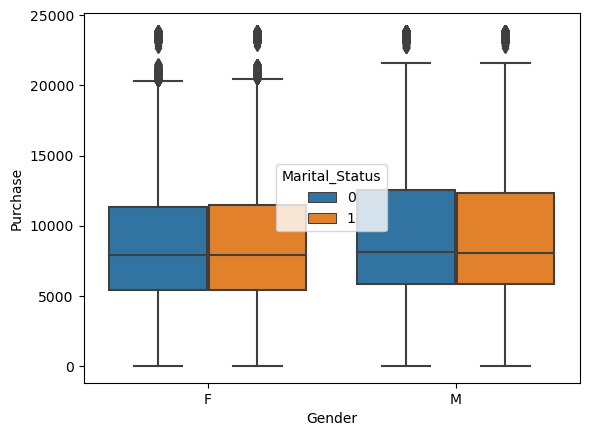

In [30]:
sns.boxplot(data=df,x="Gender",y="Purchase",hue="Marital_Status")

<AxesSubplot:xlabel='Age', ylabel='Purchase'>

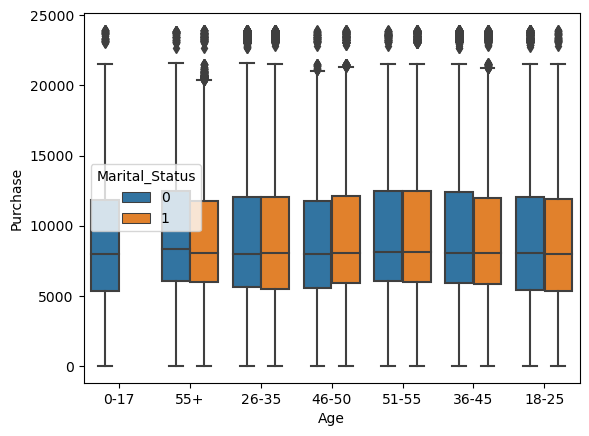

In [46]:
sns.boxplot(data=df,x="Age",y="Purchase",hue="Marital_Status")

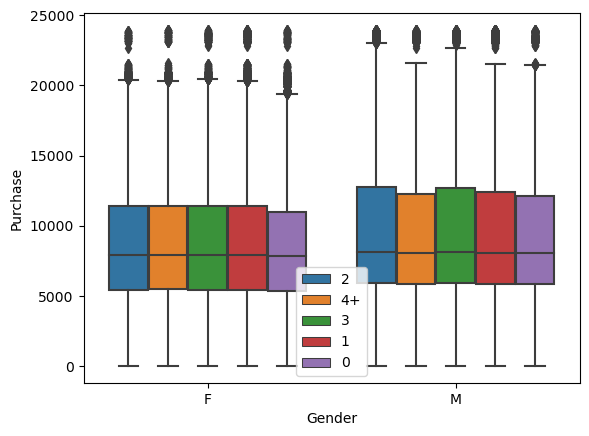

In [88]:
sns.boxplot(data=df,x="Gender",y="Purchase",hue="Stay_In_Current_City_Years")
plt.legend(loc="lower center")

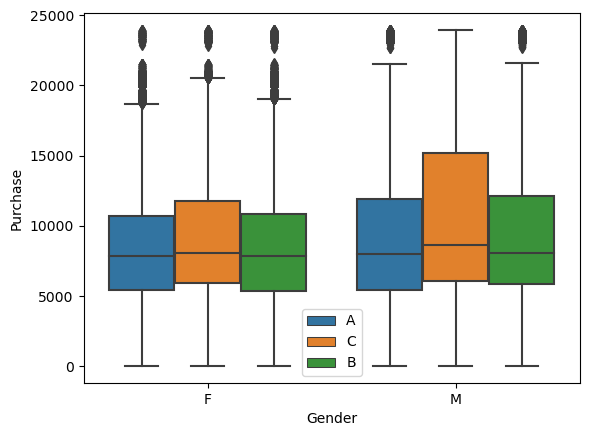

In [89]:
sns.boxplot(data=df,x="Gender",y="Purchase",hue="City_Category")
plt.legend(loc="lower center")

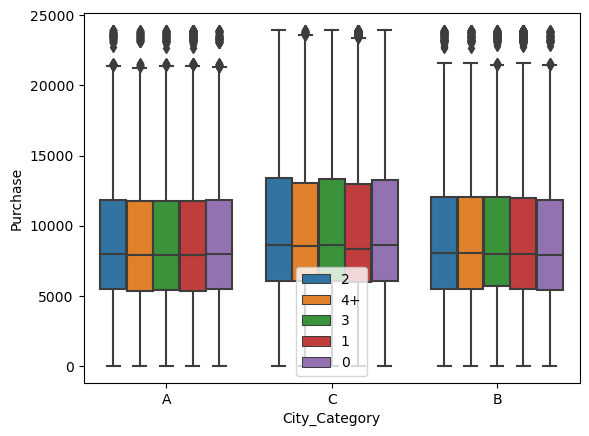

In [95]:
sns.boxplot(data=df,x="City_Category",y="Purchase",hue="Stay_In_Current_City_Years")
plt.legend(loc="lower center")

In [61]:
pd.crosstab(index=df["Gender"],columns=df["Marital_Status"],margins=True,normalize=True)*100

Marital_Status,0,1,All
Gender,,,
F,14.329319,10.360174,24.689493
M,44.705382,30.605125,75.310507
All,59.034701,40.965299,100.000000


In [62]:
pd.crosstab(index=df["Gender"],columns=df["Marital_Status"],margins=True,normalize="columns")*100

Marital_Status,0,1,All
Gender,,,
F,24.272706,25.290121,24.689493
M,75.727294,74.709879,75.310507


In [59]:
# Probability of buying products by female given she is married == 24%
# Probability of buying products by female given she is single == 25%
# Probability of buying products by male given he is married == 75%
# Probability of buying products by male given he is single == 74%

0.24272705716423748

In [64]:
pd.crosstab(index=df["Gender"],columns=df["Marital_Status"],margins=True,normalize="index")*100

Marital_Status,0,1
Gender,,
F,58.038127,41.961873
M,59.361414,40.638586
All,59.034701,40.965299


In [ ]:
# Probability of buying products by married given she is female == 58%
# Probability of buying products by single given she is female == 41%
# Probability of buying products by married given he is male == 59%
# Probability of buying products by single given he is male == 40%


# Business recommendation

In [ ]:
# Male customers are buying more, but we can't say that they are purchasing more in black friday, because there is no datetime column.
# So we can improve recommendation to male customers and married people in the age of 35 to 40. They are the one with high purchase power.
# If we recommend based on the demand of city that would help walmart to grow in business, from data we can see the city c is having high purchase.
 